In [187]:
 import numpy as np  
 import matplotlib.pyplot as plt
 import pandas as pd
 import seaborn as sns
 import math
 import scipy.stats as stats
 from sklearn.datasets import load_iris
 sns.set_style('whitegrid')

According to conditional probability 
P(B|A) = P(A∩B)/P(B)

On the left side probability of B given A is equal to the probability of A intersection B means(probability of occurrence of A and B together) divided by the probability of occurrence of B.

Similarly, 
P(A|B) = P(B∩A)/P(A)

On the left side probability of A given B is equal to the probability of B intersection A means(probability of occurrence of B and A together) divided by the probability of occurrence of A.

P(A∩B) = P(B∩A) 

therefore the equation can be written as 

P(A|B) = P(B|A).P(A)/P(B)

In [111]:
df=pd.read_csv('/content/drive/MyDrive/python/Iris.csv')

In [112]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [113]:
df = df.set_index(df.Id)

In [114]:
df = df.drop(columns='Id')

In [115]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


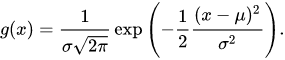

This above is the Gaussian Distribution here u signifies the mean, sigma is the standard deviation and sigma^2 is the variance

In [192]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem 
    P(A|B) = P(B|A).P(A)/P(B)
    '''
    def prior_probability(self, features, target):
        #prior probability P(A)
    
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def statistics(self, features, target):
        #this calculates  mean, variance which needed for gaussian distribution for each column and convert to numpy array
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
       #gauss probability distribution function mentoined above
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        gx= numerator / denominator
        return gx
    
    def posterior_probability(self, x):
        posteriors = []

        # calculate posterior probability P(A|B)
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.statistics(features, target)
        self.prior_probability(features, target)
        
    def predict(self, features):
        preds = [self.posterior_probability(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy


In [117]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [118]:
df.shape

(150, 5)

In [190]:
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df
#we randomly shuffle oyr data to dodge overfitting

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.0,2.9,4.5,1.5,Iris-versicolor
1,7.2,3.6,6.1,2.5,Iris-virginica
2,6.4,2.9,4.3,1.3,Iris-versicolor
3,5.8,2.6,4.0,1.2,Iris-versicolor
4,5.9,3.0,4.2,1.5,Iris-versicolor
...,...,...,...,...,...
145,5.0,3.4,1.5,0.2,Iris-setosa
146,7.0,3.2,4.7,1.4,Iris-versicolor
147,6.0,3.0,4.8,1.8,Iris-virginica
148,5.0,3.0,1.6,0.2,Iris-setosa


In [122]:
X, y  = df.iloc[:, :-1], df.iloc[:, -1]

In [123]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.8,4.0,1.2,0.2
1,5.1,2.5,3.0,1.1
2,6.6,3.0,4.4,1.4
3,5.4,3.9,1.3,0.4
4,7.9,3.8,6.4,2.0
...,...,...,...,...
145,6.3,2.8,5.1,1.5
146,6.4,3.1,5.5,1.8
147,6.3,2.5,4.9,1.5
148,6.7,3.1,5.6,2.4


In [124]:
y

0          Iris-setosa
1      Iris-versicolor
2      Iris-versicolor
3          Iris-setosa
4       Iris-virginica
            ...       
145     Iris-virginica
146     Iris-virginica
147    Iris-versicolor
148     Iris-virginica
149        Iris-setosa
Name: Species, Length: 150, dtype: object

In [125]:
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

In [126]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [127]:
x= NaiveBayesClassifier()

In [129]:
x.statistics(X_train , y_train)

(array([[5.08387097, 3.50322581, 1.46129032, 0.24193548],
        [5.9125    , 2.790625  , 4.275     , 1.33125   ],
        [6.71891892, 2.98918919, 5.63243243, 2.05675676]]),
 array([[0.11361082, 0.10934443, 0.02430801, 0.00953174],
        [0.21296875, 0.08272461, 0.185625  , 0.03214844],
        [0.3566691 , 0.11339664, 0.32867787, 0.0592111 ]]))

In [130]:
x.fit(X_train, y_train)

In [142]:
pred2 = x.predict(X_test)

In [144]:
x.accuracy(y_test , pred2)

0.92

In [147]:
y_test.value_counts(normalize= True)

Iris-setosa        0.38
Iris-versicolor    0.36
Iris-virginica     0.26
Name: Species, dtype: float64

It feels less complicated to drop the prefix word Iris, using just species also give us the same inference.

In [148]:
y_test = y_test.str.replace('Iris-setosa','setosa')
y_test = y_test.str.replace('Iris-versicolor','versicolor')
y_test = y_test.str.replace('Iris-virginica','virginica')

In [ ]:
pred2=['setosa' if x=='Iris-setosa' else x for x in pred2]
pred2=['versicolor' if x=='Iris-versicolor' else x for x in pred2]
pred2=['virginica'if x=='Iris-virginica' else x for x in pred2]

In [150]:
pred2

['setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'setosa']

In [151]:
x.accuracy(y_test, pred2)

0.92

In [ ]:
#y2_test = y_test[{'Iris-setosa':'setosa', 'Iris-versicolor':'versicolor', 'Iris-virginica':'virginica'}]

In [93]:
x.mean

array([[5.08387097, 3.50322581, 1.46129032, 0.24193548],
       [5.9125    , 2.790625  , 4.275     , 1.33125   ],
       [6.71891892, 2.98918919, 5.63243243, 2.05675676]])

In [94]:
x.var

array([[0.11361082, 0.10934443, 0.02430801, 0.00953174],
       [0.21296875, 0.08272461, 0.185625  , 0.03214844],
       [0.3566691 , 0.11339664, 0.32867787, 0.0592111 ]])

In [158]:
pred2= pd.DataFrame(pred2)

In [161]:
y_test = pd.DataFrame(y_test)

In [170]:
pred2.info()
pred2 = pred2.rename({'0':'Species'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [174]:
column=['Species']
pred2.columns=['Species']

In [175]:
pred2

,Species
0,setosa
1,versicolor
2,setosa
3,versicolor
4,versicolor
5,setosa
6,versicolor
7,setosa
8,setosa
9,virginica


Text(0.5, 1.0, 'Predicted Values in a Countplot')

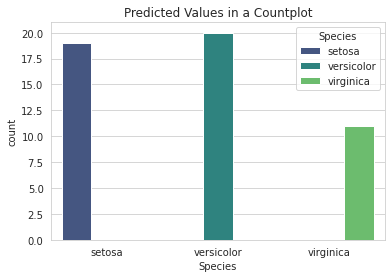

In [188]:
sns.countplot(x=pred2['Species'], data=pred2, hue=pred2['Species'], palette='viridis')
plt.title('Predicted Values in a Countplot')


Text(0.5, 1.0, 'True Values in a Countplot')

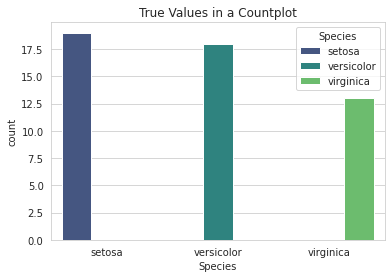

In [189]:
sns.countplot(x=y_test['Species'],hue=y_test['Species'], palette='viridis')
plt.title('True Values in a Countplot')